Problem 1

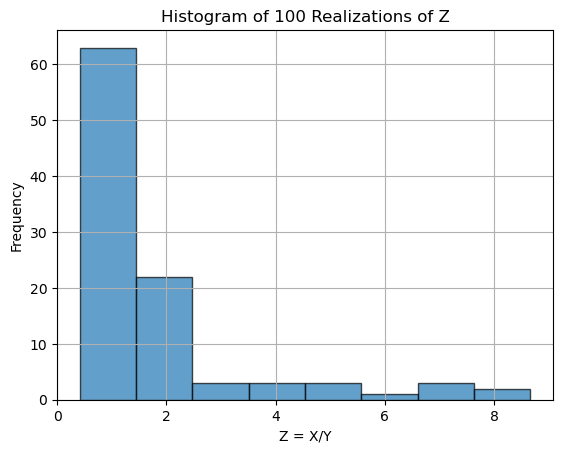

Mean of Z: 1.8070
Variance of Z: 3.0487
Standard Error on the mean: 0.1746


In [1]:


#Importing libraries for numerical calculations and plots

import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(0)

# Number of realizations
n = 100

# Generate X (uniform random numbers between [4,10))
X = np.random.uniform(4, 10, n)

# Generate Y (random integers between 1 and 10 inclusive)
Y = np.random.randint(1, 11, n)

# Compute Z = X / Y
Z = X / Y

# (a) Plot histogram
plt.hist(Z, bins=8, edgecolor='black', alpha=0.7)
plt.xlabel('Z = X/Y')
plt.ylabel('Frequency')
plt.title('Histogram of 100 Realizations of Z')
plt.grid(True)
plt.show()

# (b) Compute mean and variance (sample variance with ddof=1)
mean_Z = np.mean(Z)
var_Z = np.var(Z, ddof=1)

# (c) Compute standard error of the mean
std_error = np.std(Z, ddof=1) / np.sqrt(n)

# Display results clearly
print(f"Mean of Z: {mean_Z:.4f}")
print(f"Variance of Z: {var_Z:.4f}")
print(f"Standard Error on the mean: {std_error:.4f}")

Problem 2
The classical model that describes this system is the Moran Model, a widely used stochastic process in population genetics.

In the Moran model, a population of fixed size 𝑁; N is maintained through a balance between birth and death events, occurring sequentially and randomly. Specifically, at each step:

One individual is randomly chosen to be removed (in our scenario, this corresponds to differentiation of a stem cell).
Immediately afterward, another individual is selected to reproduce (in this case, another stem cell divides), keeping the population size constant.
This mechanism directly matches the biological process described in the question, where stem cell differentiation (cell loss) and replacement division (cell gain) ensure the stem-cell niche maintains a fixed total size, N = 100.

(a) Function to calculate differentiation probability:

In [2]:
# (a) Probability that a randomly chosen cell for differentiation is mutant
def diff_prob(X, N):
    return X / N

(b) Function to calculate division probability (with selective advantage):¶

In [3]:
#X= Size of mutant population, N= Size of total population, s=strength of fitness, Y= size of WT population

def div_prob(X, N, s):
    if X == 0: #If there is no mutant, the probability is 0
        return 0.0
    # As, N= X+Y,we have Y= N-X
    #Probabilty of single mutant cell= s/(X*s + Y). 
    #Probability of any mutant cell = X*Probability of single mutant cell which is:
    return (X * s) / (X * s + (N - X))

c) Simulation over time (corrected sequential differentiation and division):

In [4]:
#X0: Initial number of mutant cells.
#N: Total population size (fixed at 100).
#r0: Differentiation rate per cell.
#s: Strength of fitness of mutant cells. 
#T: Total simulation time.

import numpy as np  # Import numpy for numerical computations

# (c) Simulate mutant population changes over time
def simulation_over_time(X0, N, r0, s, T):
    times = [0]        # Keep track of event times, starting from 0
    mutants = [X0]     # Record the mutant cell count at each time point
    current_time = 0   # Set initial time to zero
    X = X0             # Initial mutant cell count

    # Run simulation until we reach total simulation duration T
    while current_time < T:
        # Randomly determine how long until the next event (differentiation and division)
        dt = np.random.exponential(1 / (N * r0))
        current_time += dt  # Move forward in time by dt

        # If we exceed the simulation end time, stop the loop
        if current_time > T:
            break

        # Decide if the cell chosen for differentiation is mutant
        # (probability depends on fraction of mutants in population)
        if np.random.rand() < diff_prob(X, N):
            X -= 1  # Mutant cell differentiates and leaves the population

        # Decide if the dividing cell is mutant based on fitness advantage
        if np.random.rand() < div_prob(X, N, s):
            X += 1  # Mutant cell divides, adding one more mutant to the population

        # Ensure mutant count stays within valid limits [0, N]
        X = max(0, min(X, N))

        # Record the updated mutant count and current time
        times.append(current_time)
        mutants.append(X)

    # Convert lists to numpy arrays for easier analysis and plotting
    return np.array(times), np.array(mutants)


(d) Running 10 simulations and plotting:

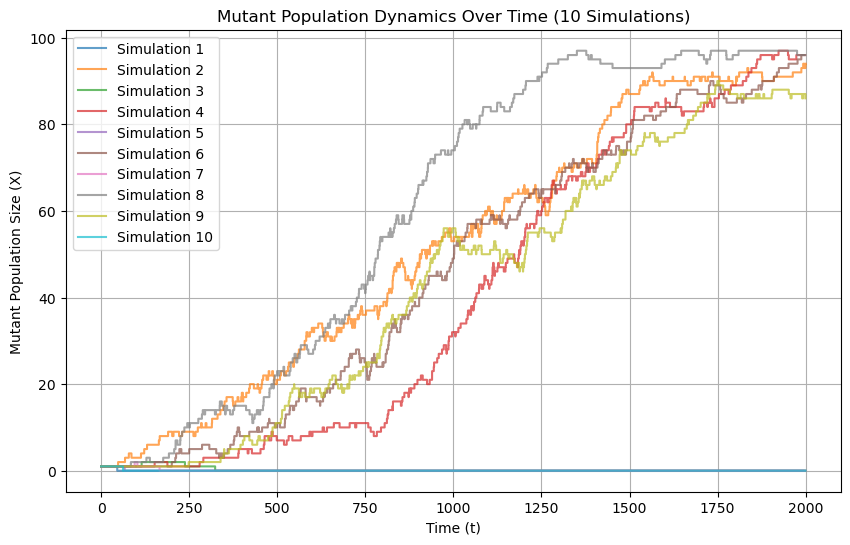

In [5]:
X0, N, r0, s, T = 1, 100, 0.005, 2, 2000
num_simulations = 10

plt.figure(figsize=(10, 6))

for i in range(num_simulations):
    times, mutants = simulation_over_time(X0, N, r0, s, T)
    plt.step(times, mutants, where='post', alpha=0.7, label=f"Simulation {i+1}")

plt.xlabel("Time (t)")
plt.ylabel("Mutant Population Size (X)")
plt.title("Mutant Population Dynamics Over Time (10 Simulations)")
plt.legend()
plt.grid(True)
plt.show()

(e) Estimating long-term extinction probability:

In [6]:
num_simulations = 1000
extinction_count = 0

for _ in range(num_simulations):
    _, mutants = simulation_over_time(X0, N, r0, s, T)
    if mutants[-1] == 0:
        extinction_count += 1

extinction_prob = extinction_count / num_simulations
print(f"Estimated long-term extinction probability: {extinction_prob:.3f}")

Estimated long-term extinction probability: 0.507
